In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from pandas.api.types import is_numeric_dtype
import numpy as np

In [3]:
CSV_PATH = Path("car_sales_data.csv")
df = pd.read_csv(CSV_PATH)

def find_col(options):
    lower_map = {c.lower().replace(" ", "").replace("_", ""): c for c in df.columns}
    for opt in options:
        key = opt.lower().replace(" ", "").replace("_", "")
        if key in lower_map:
            return lower_map[key]
    for c in df.columns:
        if any(opt in c.lower() for opt in options):
            return c
    raise KeyError(f"Couldn't find a column like: {options}")

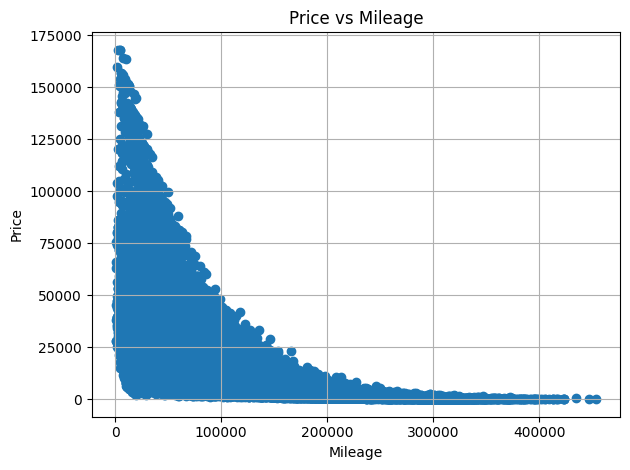

In [4]:
price_col = find_col(["price"])
mileage_col = find_col(["mileage", "milage"])

plot_df = df[[mileage_col, price_col]].dropna()

plt.figure()
plt.scatter(plot_df[mileage_col], plot_df[price_col])  # default colors/styles only
plt.xlabel(mileage_col)
plt.ylabel(price_col)
plt.title(f"{price_col} vs {mileage_col}")
plt.grid(True)
plt.tight_layout()
plt.show()

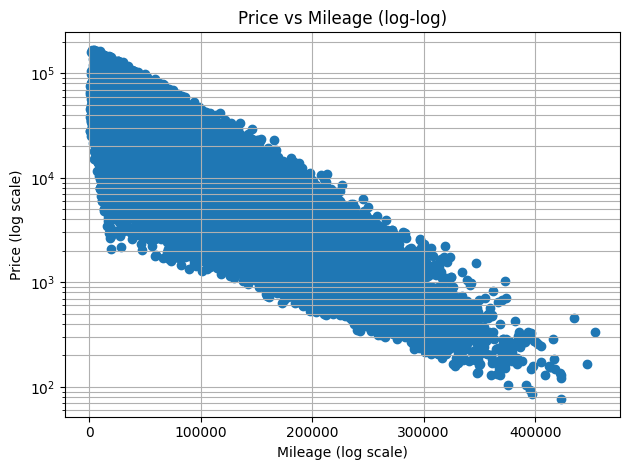

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
41001,BMW,M5,5.0,Petrol,1986,453537,331
41039,BMW,X3,3.0,Diesel,1986,446897,167
26780,BMW,M5,5.0,Petrol,1988,434923,454
42430,Ford,Mondeo,2.0,Diesel,1984,423108,129
18546,VW,Passat,1.4,Diesel,1985,423053,122
...,...,...,...,...,...,...,...
6674,Toyota,RAV4,2.4,Petrol,1990,356165,477
44865,VW,Passat,1.4,Petrol,1989,355992,293
26625,VW,Passat,1.8,Petrol,1986,355814,272
27498,VW,Passat,2.0,Diesel,1992,355126,453


,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
148,VW,Polo,1.4,Petrol,1984,225099,489
405,BMW,M5,4.0,Petrol,1984,89953,7064
1020,Ford,Focus,1.4,Petrol,1984,238276,613
1201,Toyota,Prius,1.4,Hybrid,1984,319446,356
1357,Toyota,Yaris,1.2,Hybrid,1984,183547,886
...,...,...,...,...,...,...,...
34077,VW,Polo,2.0,Petrol,1984,193138,777
34244,Ford,Fiesta,1.2,Petrol,1984,316261,188
34524,BMW,X3,2.4,Petrol,1984,264759,728
34855,BMW,Z4,2.4,Petrol,1984,208219,1163


,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
218,Toyota,Yaris,1.0,Hybrid,2022,5179,36086
333,Ford,Focus,1.6,Diesel,2022,5750,49870
352,Ford,Mondeo,2.0,Diesel,2022,1487,56459
372,Ford,Mondeo,1.6,Diesel,2022,7454,48982
472,Toyota,RAV4,2.0,Hybrid,2022,9373,76303
...,...,...,...,...,...,...,...
15511,Ford,Focus,1.4,Diesel,2022,4029,47062
15542,Porsche,718 Cayman,2.0,Petrol,2022,3427,71719
16289,Toyota,Yaris,1.0,Petrol,2022,4252,30215
16450,Porsche,Cayenne,2.6,Petrol,2022,6153,95479


In [12]:
price_col = find_col(["price"])
mileage_col = find_col(["mileage"])
year_col = find_col(["year"])

plot_df = df[[mileage_col, price_col]].dropna()
plot_df = plot_df[(plot_df[mileage_col] > 0) & (plot_df[price_col] > 0)]  # log-safe

plt.figure()
plt.scatter(plot_df[mileage_col], plot_df[price_col])  # default style/colors only
#plt.xscale("log")
plt.yscale("log")
plt.xlabel(mileage_col + " (log scale)")
plt.ylabel(price_col + " (log scale)")
plt.title(f"{price_col} vs {mileage_col} (log-log)")
plt.grid(True, which="both")
plt.tight_layout()
plt.show()

# --- Top 100 cars with the highest mileage ---
top_100_mileage = (
    df.dropna(subset=[mileage_col])               # keep rows with mileage
      .query(f"{mileage_col} > 0")                # positive mileage only
      .nlargest(100, mileage_col)                 # top 100 by mileage
      .copy()
)

# Ensure the year column is numeric (in case it's stored as strings)
df_year = df.copy()
df_year[year_col] = pd.to_numeric(df_year[year_col], errors="coerce")

# Oldest 100 cars (smallest year)
oldest_100 = (
    df_year.dropna(subset=[year_col])
           .nsmallest(100, year_col)
           .copy()
)

# Newest 100 cars (largest year)
newest_100 = (
    df_year.dropna(subset=[year_col])
           .nlargest(100, year_col)
           .copy()
)


# take a quick look
display(top_100_mileage)          # if you're in a notebook
display(oldest_100)              # if you're in a notebook
display(newest_100)              # if you're in a notebook

C:\Users\Georg\AppData\Local\Temp\ipykernel_2020\1005890092.py:34: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


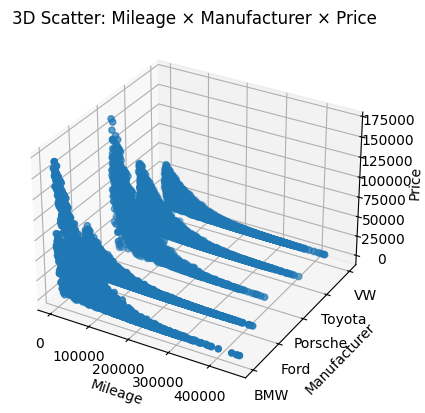

In [6]:
# assumes df and find_col() exist
price_col = find_col(["price"])
mileage_col = find_col(["mileage"])
manufacturer_col = find_col(["manufacturer"])

plot_df = df[[mileage_col, price_col, manufacturer_col]].dropna()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Y axis: manufacturer (handle categorical)
y_vals = plot_df[manufacturer_col]
if not is_numeric_dtype(y_vals):
    cats = pd.Categorical(y_vals)
    y = cats.codes
    ax.set_yticks(range(len(cats.categories)))
    ax.set_yticklabels(cats.categories)
else:
    y = y_vals.values

# Z axis: price (usually numeric)
z = plot_df[price_col].values

# X axis: mileage
x = plot_df[mileage_col].values

ax.scatter(x, y, z)

ax.set_xlabel(mileage_col)
ax.set_ylabel(manufacturer_col)  # now on Y
ax.set_zlabel(price_col)         # now on Z
ax.set_title("3D Scatter: Mileage × Manufacturer × Price")
ax.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Georg\AppData\Local\Temp\ipykernel_2020\3330206874.py:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


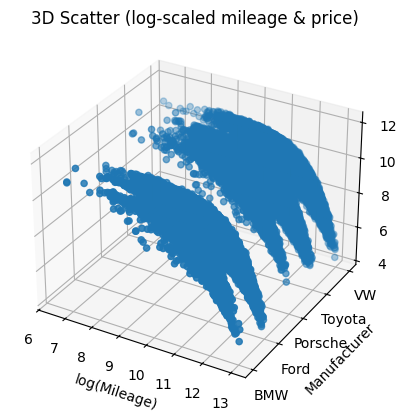

In [7]:
# assumes df and find_col() exist
price_col = find_col(["price"])
mileage_col = find_col(["mileage"])
manufacturer_col = find_col(["manufacturer"])

plot_df = df[[mileage_col, price_col, manufacturer_col]].dropna()

# keep only positive mileage and price for log scaling
mask = (plot_df[mileage_col] > 0) & (plot_df[price_col] > 0)
plot_df = plot_df[mask]

# X: log10(mileage)
x = np.log(plot_df[mileage_col].values)

# Y: manufacturer (handle categorical)
y_vals = plot_df[manufacturer_col]
if not is_numeric_dtype(y_vals):
    cats = pd.Categorical(y_vals)
    y = cats.codes
    y_tick_positions = range(len(cats.categories))
    y_tick_labels = list(cats.categories)
else:
    y = y_vals.values
    y_tick_positions = None
    y_tick_labels = None

# Z: log10(price)
z = np.log(plot_df[price_col].values)

# --- plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

ax.set_xlabel(f"log({mileage_col})")
ax.set_ylabel(manufacturer_col)
ax.set_zlabel(f"log({price_col})")
ax.set_title("3D Scatter (log-scaled mileage & price)")

# apply manufacturer tick labels if categorical
if y_tick_positions is not None:
    ax.set_yticks(y_tick_positions)
    ax.set_yticklabels(y_tick_labels)

ax.grid(True)
plt.tight_layout()
plt.show()